## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [18]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [19]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [21]:
# QA checking gross number of mouse IDs
merged_df["Mouse ID"].count()

1893

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Option 1:  use a combination of .duplicated and .loc methods to identify the Mouse ID(s) that are
# duplicated within the data set, then load into a new dataframe via the .DataFrame method for 
# pretty display:

dup_merged_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first'),'Mouse ID'].unique()
ID_dup_merged_df = pd.DataFrame(dup_merged_df)
ID_dup_merged_df

,0
0,g989


In [23]:
# or Option 2:  for expediency skip the last dataframe portion and just load the result:

dup_merged_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first'),'Mouse ID'].unique()
dup_merged_df

#! Office Hours Question:  What is this result called?

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 

# We're using the .loc method's boolean search functionality here.  We've identified the duplicate
# Mouse ID + Timepoint IDs above, so we can pull the full data detail from our original merged
# dataframe.
full_ID_dup_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
full_ID_dup_mouse

#! Office Hours / Tutor Question:  Regarding the .loc method, second parameter ":" doesn't appear 
#  to change the data output at all. I know this means "everything / all"; Is this necessary or
#  a best practice, or is it truly redundant / incorrect?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
# Confirming new dataset row count; We had five duplicates to remove, the number here confirms 
# it worked as intended.
cleaned_merged_df['Mouse ID'].count()

1888

In [26]:
# Checking the number of mice in the clean DataFrame.
cleaned_merged_df['Mouse ID'].nunique()
# Presumably another QA step to ensure the duplicate mouse wasn't eliminated entirely?  
# The number matches our initial unique count, so we're good.

249

In [141]:
# Exporting merged data for reference, i.e., ensuring totals are accurate
# cleaned_merged_df.to_csv(r'C:\Users\simon\OneDrive\Desktop\merged_data.csv', index = False)

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the
# tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug 
# regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_summary = cleaned_merged_df.groupby("Drug Regimen")

summary_mean = grouped_summary["Tumor Volume (mm3)"].mean()
summary_median = grouped_summary["Tumor Volume (mm3)"].median()
summary_var = grouped_summary["Tumor Volume (mm3)"].var()
summary_stdev = grouped_summary["Tumor Volume (mm3)"].std()
summary_SEM = grouped_summary["Tumor Volume (mm3)"].sem()


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table = pd.DataFrame({"Tumor Volume Mean": summary_mean,
                              "Tumor Volume Median": summary_median,
                              "Tumor Volume Variance": summary_var,
                              "Tumor Volume Std Dev": summary_stdev,
                              "Tumor Volume SEM": summary_SEM                             
                             })
summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Using the aggregation method, produce the same summary statistics in a single line

# HOLEY MOLEY the aggregate method saves a lot of time and typing.
summary_table_agg = grouped_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

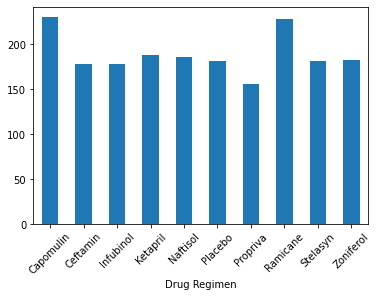

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_measure_count = cleaned_merged_df.groupby("Drug Regimen")["Mouse ID"].count()

# Interesting - Because we utlized the pandas method above, there was no need to specify X-Values
# or y-values in the .plot line below.  In fact, doing so causes the code to break.

#! Tutor / TA Question: What if I wanted to flip the x and y values though?

drug_measure_count_Bar = drug_measure_count.plot(kind='bar',
                                                 rot=45)

drug_measure_count_Bar



<function matplotlib.pyplot.show(close=None, block=None)>

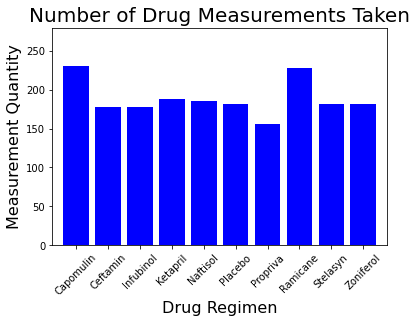

In [64]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# The pyplot method allows for the explicity x and y value designation.
# Citing Sources:  Discovered .tolist method solution & x tick styling clarification from:
# https://github.com/mpetrozzi78/The-power-of-plots/blob/master/ThePowerOfPlots.ipynb & 
# https://github.com/ermiasgelaye/Matplotlib-Challenge/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb

#! Tutor / TA Questin:  If not using the .tolist method, how were we to accomplish this?

# Need to create a list of the medicines from our grouped data.

bar_drug_id = summary_table_agg.index.tolist()

# Now need to create a list of the regimen counts from my grouped dataframe
bar_drug_measure_count = cleaned_merged_df.groupby("Drug Regimen")["Mouse ID"].count().tolist()
bar_drug_measure_count

x_axis = np.arange(len(bar_drug_measure_count))
plt.bar(bar_drug_id, bar_drug_measure_count, color='b', align='center')
# List comprehension
x_ticks_loc = [value for value in x_axis]
plt.xticks(x_ticks_loc, bar_drug_id, rotation=45)
# x spacing
plt.xlim(-0.75, len(x_axis)-0.25)
# y spacing
plt.ylim(0, max(bar_drug_measure_count)+50)
# labels
plt.title("Number of Drug Measurements Taken", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Measurement Quantity", fontsize = 16)
plt.show


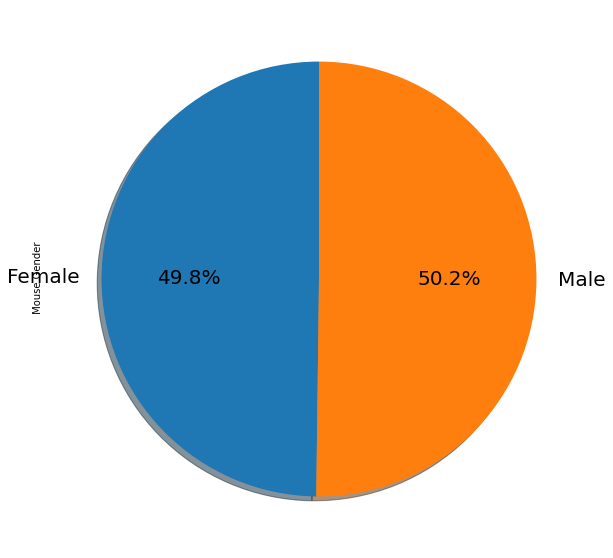

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# found help via https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
gender_count = cleaned_merged_df.groupby("Sex")["Mouse ID"].nunique().plot(
    kind='pie', 
    subplots=True, 
    shadow = True,
    startangle=90,
    figsize=(15,10),
    autopct='%1.1f%%',
    ylabel=(" Mouse Gender"),
    fontsize=20)


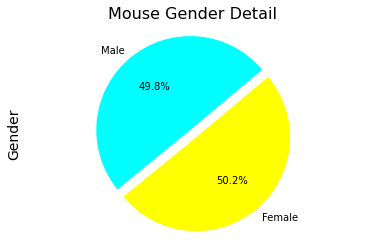

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create lists to hold pie labels, values, and various aesthetic options
pie_label = ["Male","Female"]
pie_values = [49.8, 50.2]
pie_color = ["aqua","yellow"]
explode = (0.1, 0)

plt.pie(pie_values,
        explode=explode,
        labels=pie_label,
        colors=pie_color,
        autopct="%1.1f%%",
        startangle=40)
plt.title("Mouse Gender Detail", fontsize=16)     
plt.ylabel("Gender", fontsize=14)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_merged_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint

merged_2_data = pd.merge(cleaned_merged_df, max_timepoint, on=("Mouse ID"), how="left")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_2_data = merged_2_data.rename(columns={"Timepoint_x": "Timepoint",
                                              "Timepoint_y": "Max_Timepoint"})
merged_2_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = summary_table_agg.index.tolist()
treatment_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [144]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
